In [1]:
install.packages("e1071")

Installing package into 'C:/Users/abine/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abine\AppData\Local\Temp\Rtmps70Gb1\downloaded_packages


In [21]:
library("e1071")
library("ggplot2")
library("dplyr")

In [4]:
loans<-read.csv('C:\\Users\\abine\\OneDrive\\Documents\\Datasets\\loan data\\loan_data.csv')

In [9]:
head(loans)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,1,debt_consolidation,0.1189,829.10,11.35041,19.48,737,5639.958,28854,52.1,0,0,0,0
2,1,credit_card,0.1071,228.22,11.08214,14.29,707,2760.000,33623,76.7,0,0,0,0
3,1,debt_consolidation,0.1357,366.86,10.37349,11.63,682,4710.000,3511,25.6,1,0,0,0
4,1,debt_consolidation,0.1008,162.34,11.35041,8.10,712,2699.958,33667,73.2,1,0,0,0
5,1,credit_card,0.1426,102.92,11.29973,14.97,667,4066.000,4740,39.5,0,1,0,0
6,1,credit_card,0.0788,125.13,11.90497,16.98,727,6120.042,50807,51.0,0,0,0,0


In [ ]:
Our objective is to classify wheter its 0 OR 1 in not.fully.paid

Here in the colum not.fully.paid 1 means that person has paid back the loan completely and 0 means the loan is yet to be paid

In [5]:
str(loans)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : Factor w/ 7 levels "all_other","credit_card",..: 3 2 3 3 2 2 3 1 5 3 ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...


In [8]:
summary(loans)

 credit.policy                 purpose        int.rate       installment    
 Min.   :0.000   all_other         :2331   Min.   :0.0600   Min.   : 15.67  
 1st Qu.:1.000   credit_card       :1262   1st Qu.:0.1039   1st Qu.:163.77  
 Median :1.000   debt_consolidation:3957   Median :0.1221   Median :268.95  
 Mean   :0.805   educational       : 343   Mean   :0.1226   Mean   :319.09  
 3rd Qu.:1.000   home_improvement  : 629   3rd Qu.:0.1407   3rd Qu.:432.76  
 Max.   :1.000   major_purchase    : 437   Max.   :0.2164   Max.   :940.14  
                 small_business    : 619                                    
 log.annual.inc        dti              fico       days.with.cr.line
 Min.   : 7.548   Min.   : 0.000   Min.   :612.0   Min.   :  179    
 1st Qu.:10.558   1st Qu.: 7.213   1st Qu.:682.0   1st Qu.: 2820    
 Median :10.929   Median :12.665   Median :707.0   Median : 4140    
 Mean   :10.932   Mean   :12.607   Mean   :710.8   Mean   : 4561    
 3rd Qu.:11.291   3rd Qu.:17.950   3rd 

Changing some variables to factors

In [11]:
loans$credit.policy=factor(loans$credit.policy)
loans$inq.last.6mths=factor(loans$inq.last.6mths)
loans$delinq.2yrs=factor(loans$delinq.2yrs)
loans$pub.rec=factor(loans$pub.rec)
loans$not.fully.paid=factor(loans$not.fully.paid)

In [12]:
str(loans)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ purpose          : Factor w/ 7 levels "all_other","credit_card",..: 3 2 3 3 2 2 3 1 5 3 ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : Factor w/ 28 levels "0","1","2","3",..: 1 1 2 2 1 1 1 1 2 2 ...
 $ delinq.2yrs      : Factor w/ 11 levels "0","1","2","3",..: 1 1 1 1 2 1 1 1 1 1 ...
 $ pub.rec          : Factor w/ 6 levels "0","1","2","3",..: 1 1 1 1 1 1 2 1 1 1 ...
 $ not.fully.paid   

In [14]:
any(is.na(loans))

[1] FALSE

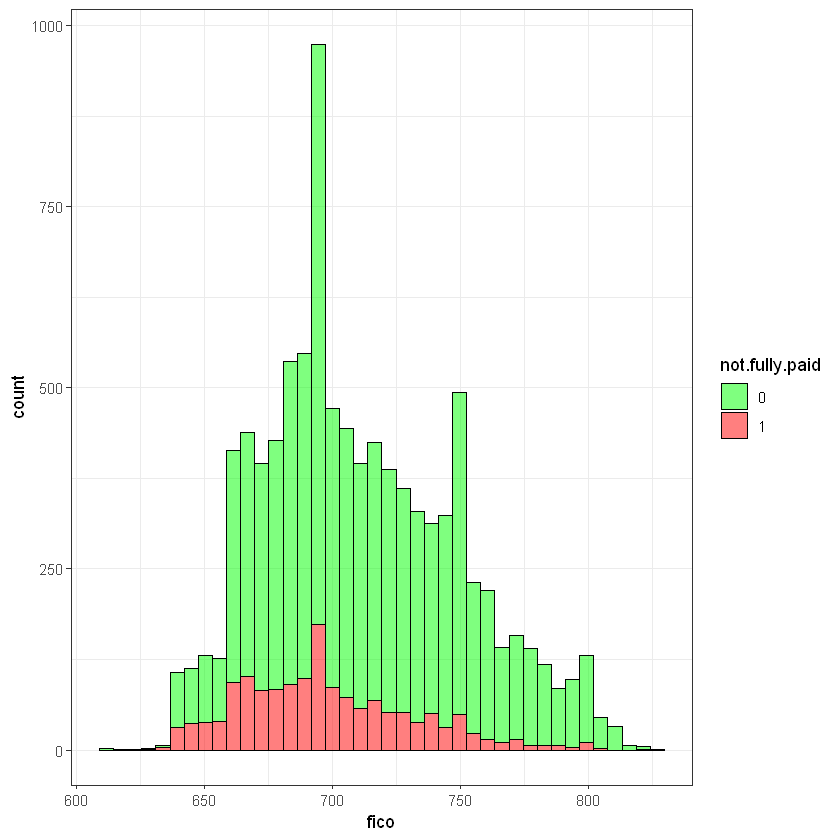

In [24]:
pl<-ggplot(loans, aes(x=fico))
pl<-pl+geom_histogram(aes(fill=not.fully.paid),color='black',bins=40,alpha=0.5)
pl+scale_fill_manual(values=c("green","red"))+theme_bw()

Borrowers with high fico score tends to pay back

But not all boorowers in the range 650 to 750 payed the loan back

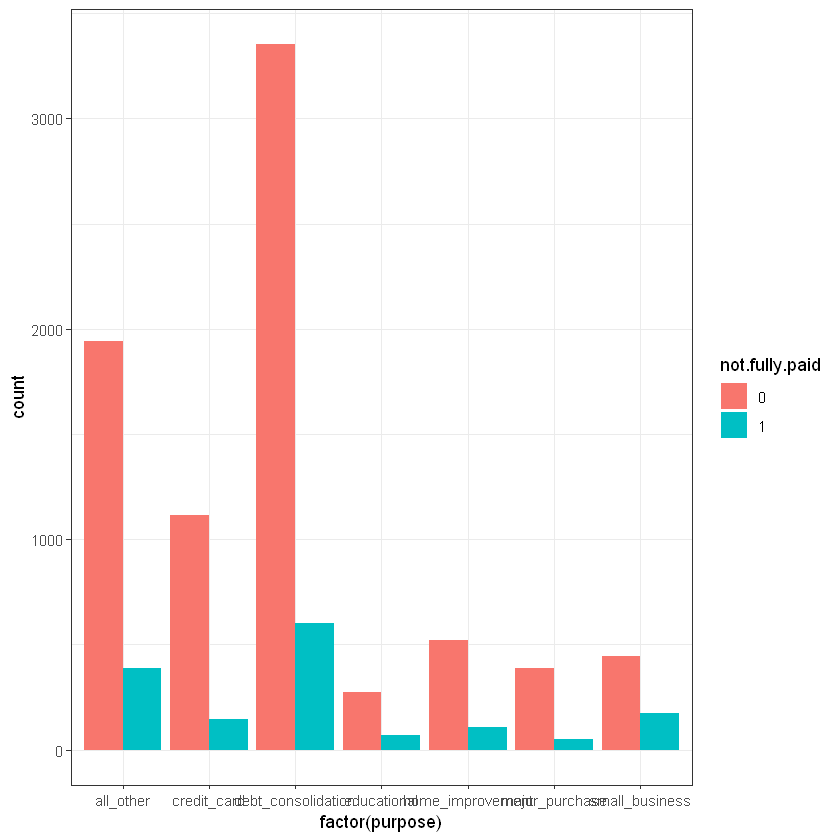

In [25]:
pl=ggplot(loans,aes(x=factor(purpose)))
pl=pl+geom_bar(aes(fill=not.fully.paid),position="dodge")
pl+theme_bw()

Almost 4000 needed money for debt consolidations

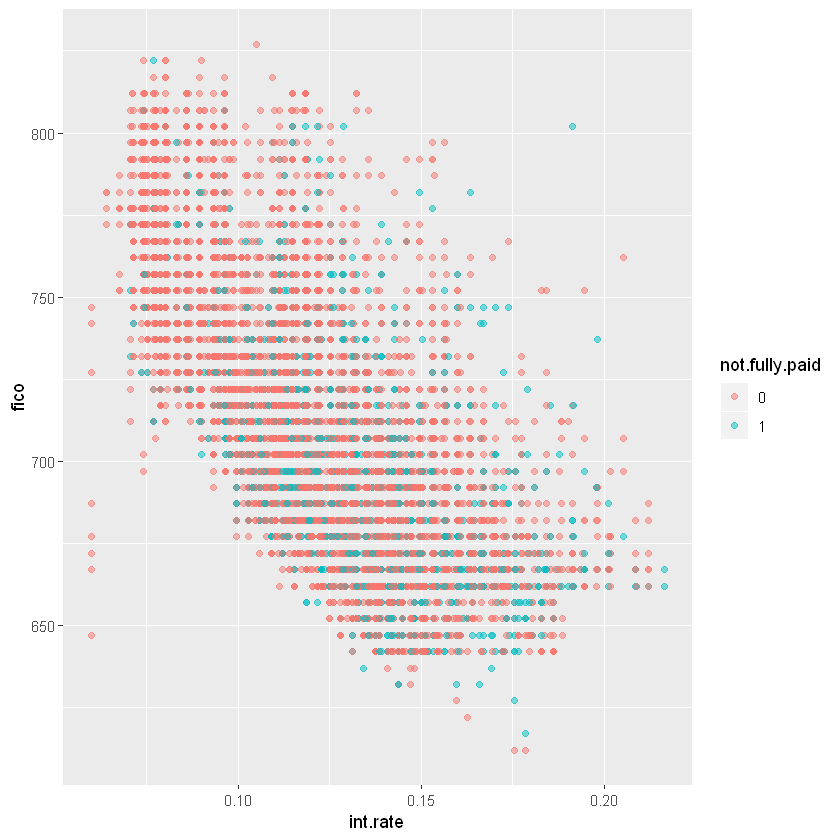

In [26]:
ggplot(loans,aes(int.rate,fico))+geom_point(aes(color=not.fully.paid),alpha=0.5)

low fico score not likely pay back so they will have higher intrest reates

## BUILDING MODEL

In [27]:
library(caTools)
set.seed(101)
spl=sample.split(loans$not.fully.paid,0.7)
train=subset(loans,spl=TRUE)
test=subset(loans,spl=FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.2"

Checking the mdoel without tuning

In [28]:
model=svm(not.fully.paid~.,data=train)

In [29]:
summary(model)


Call:
svm(formula = not.fully.paid ~ ., data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  4030

 ( 2497 1533 )


Number of Classes:  2 

Levels: 
 0 1




In [30]:
predicted.values=predict(model,test[1:13])
table(predicted.values,test$not.fully.paid)

                
predicted.values    0    1
               0 8045 1532
               1    0    1

These are not good results, because 1532 items were classified wrong as 1 instead of 0, thats a lot of misclassification

This is due to gamma and cost parametrs are incorrect.We have to tune the model for the correct parameters

## TUNING THE MODEL

COST:The cost parameter decides how much an SVM should be allowed to “bend” with the data. For a low cost, you aim for a smooth decision surface and for a higher cost, you aim to classify more points correctly.

GAMMA:the gamma parameter defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'.

In [ ]:
#OPTION 1
#svm.tuned=tune(svm, train.x=not.fully.paid~.,data=train,kernel='radial',ranges=list(cost=c(10,100),gamma=c(0.1,1)))

In [ ]:
#OPTION 2
#tuned.results=tune(svm, train.x=not.fully.paid~.,data=train,kernel='radial',ranges=list(cost=c(100,200),gamma=c(0.1)))

In [ ]:
#OPTION 3
#tuned.results=tune(svm, train.x=not.fully.paid~.,data=train,kernel='radial',ranges=list(cost=c(1,10),gamma=c(0.1,1)))

we are going to use gamma=1 and cost=10

In [34]:
model=svm(not.fully.paid~.,data=train,gamma=1,cost=10)
predicted.values=predict(model,test[1:13])
table(predicted.values,test$not.fully.paid)

                
predicted.values    0    1
               0 8045    5
               1    0 1528

This looks like so far the best gamma and cost parameters for the model

There are only 5 Misclassifcations

In [1]:
TN=8045
FP=5
FN=0
TP=1528

In [2]:
ERR=(FP+FN)/(TN+FP+FN+TP)
ERR

[1] 0.0005220297

ERR (Error Rate) is the percentage of wrong predictions of our model. Our model has an ERR of 0.0005 stating that .05 % wrong predictions have been done by the model.

In [3]:
ACC=(TP + TN)/(TN + FP + FN + TP)
ACC

[1] 0.999478

ACC (Accuracy) is the percentage of correct predictions of our model. Our model has an ACC of 0.999 stating that 99 % correct predictions have been made by the model.

In [4]:
SN = TP/(TP + FN)
SN

[1] 1

SN (Sensitivity) is the number of correct positive predictions divided by the total number of positives. Our model has an SN of 1 stating that 100 % correct positive predictions were made out of the total positives.

In [5]:
SP = TN/(TN + FP)
SP

[1] 0.9993789

SP (Specificity) is the number of correct negative predictions divided by the total number of negatives. Our model has an SP of 0.999 stating that 99.9 % correct negative predictions were made out of the total negatives.

In [6]:
PREC = TP/(TP + FP)
PREC

[1] 0.9967384

PREC (Precision) is the number of correct positive predictions divided by the total number of positive predictions. Our model has a PREC of 0.996 stating that 99.6 % of the predictions regarding the positive predicted values are correct.

In [7]:
FPR = FP/(TN + FP)
FPR

[1] 0.000621118

FPR (False Positive Rate) is the number of incorrect positive predictions divided by the total number of negatives. Our model has a FPR of 0.0006 stating that 0.06 % of the predictions regarding the positive predicted values are incorrect.

In [35]:
model=svm(not.fully.paid~.,data=train,gamma=0.1,cost=200)
predicted.values=predict(model,test[1:13])
table(predicted.values,test$not.fully.paid)

                
predicted.values    0    1
               0 8041  431
               1    4 1102

In [8]:
TN=8045
FP=431
FN=4
TP=1102

There are lot of FP while using these parameters

In [9]:
ACC=(TP + TN)/(TN + FP + FN + TP)
ACC

[1] 0.9546024

Here the accuraccy is lesser than previous model